# UTKFace Image Dataset Analysis

-----

## Age Estimation Accuracies

Here we plot age estimation accuracies, as filtered by age range, racial category, and gender.

In [1]:
import json
import numpy as np
import pandas as pd
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
plt.ioff()
%matplotlib inline
from analysis_3_filter_visualise import *

image_masks_fpath = "utkface/img-masks/"
utkface_data = json.loads(open("metadataset_utkface_activations.json").read())

# This function visualises the age estimation accuracies or the age estimation differences
def visualise(utkface_data, selection=0, selection_b="age_estimation_accuracies"):
    alt_keys = [KEYS_GENDER_AGE, KEYS_RACE_AGE]
    alt_names = [GENDERS, RACES]
    alt_term = ["gender_real", "race_real"]
    alt_title = ["Gender", "Racial Category"]
    alt_characteristics = [["Female", "Male"], [ "Other", "Indian", "African",  "Asian", "Caucasian"]]
    alt_ylim = [[0,6], [0,2.5]]
    alt_ylim_2 = [[0,0.04], [0,0.02]]
    utkface_age_estimation = dict()
    age_ranges_described = [" - ".join([str(y) for y in x]) for x in AGE_RANGES]
    # For every age range
    for age_range in age_ranges_described:
        # Produce the literal term that describes the age range
        age_range_literal = [int(x) for x in age_range.split(" - ")]
        utkface_age_estimation[age_range] = visualise_pairplot(
                filter_dataset(utkface_data, alt_keys[selection], alt_term[selection], 
                alt_names[selection], age_min=age_range_literal[0], 
                age_max=age_range_literal[1]), accuracy_cutoff=0.90)
        utkface_age_estimation[age_range]["age_estimation_difference"] = (
            utkface_age_estimation[age_range]["age_estimation"] - utkface_age_estimation[age_range]["age_real"])
        # Generate the age estimation accuracies
        if (selection_b == "age_estimation_accuracies"):
            ######
            # Plot the age estimation accuracies
            ######
            g = sns.displot(
                utkface_age_estimation[age_range][[ alt_term[selection], "age_estimation_accuracy"]],
                kind="kde", fill=True, hue=alt_term[selection], x='age_estimation_accuracy', 
                    height=2, aspect=2, legend=False)
            plt.xlim(0.5,1)
            plt.ylim(alt_ylim[selection][0], alt_ylim[selection][1])
            if (age_range == "26 - 100"):
                plt.legend(title=alt_title[selection], loc="upper left", labels=alt_names[selection])
            g.set(yticklabels=([str(x/100) for x in list(range(int(alt_ylim[selection][0]*100), int((alt_ylim[selection][1])*100), int(abs(alt_ylim[selection][0]-alt_ylim[selection][1]/5)*100)))]))
            plt.xlabel("%s Year Old Age Range" % age_range)
            plt.tight_layout()
            plt.savefig(age_range,dpi=200)
        else:
            ######
            # Plot the age estimation difference
            ######
            g = sns.displot(
                utkface_age_estimation[age_range][[ alt_term[selection], "age_estimation_difference"]],
                kind="kde", fill=True, hue=alt_term[selection], x='age_estimation_difference', height=2, aspect=2, legend=False)
            plt.xlim(-60,60)
            plt.ylim(alt_ylim_2[selection][0], alt_ylim_2[selection][1])
            plt.xlabel(None)
            if (age_range == "26 - 100"):
                plt.legend(title=alt_title[selection], loc="upper left", labels=alt_characteristics[selection])
            plt.ylabel(None)
            plt.tight_layout()
            plt.savefig(age_range,dpi=200)

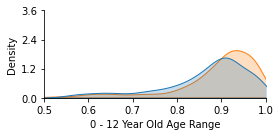

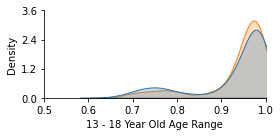

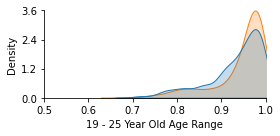

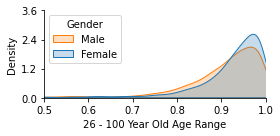

In [2]:
visualise(utkface_data, selection=0, selection_b="age_estimation_accuracies")

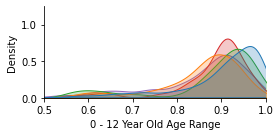

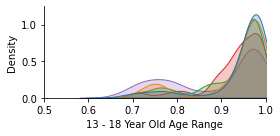

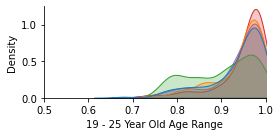

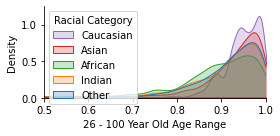

In [3]:
visualise(utkface_data, selection=1, selection_b="age_estimation_accuracies")

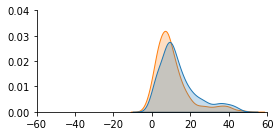

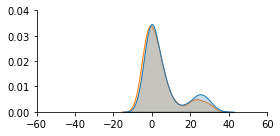

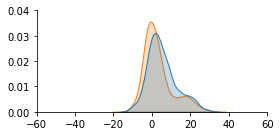

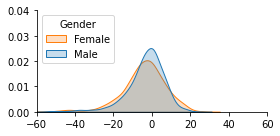

In [4]:
visualise(utkface_data, selection=0, selection_b="age_differences")

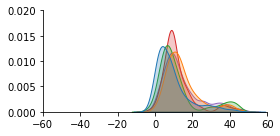

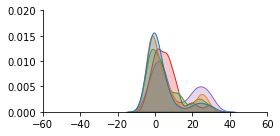

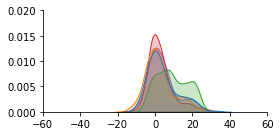

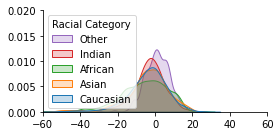

In [5]:
visualise(utkface_data, selection=1, selection_b="age_differences")